In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

# 105B Practice problem 

## Q1: 对函数 <font color='red'>$f(x)=\frac{1}{1+9x^2}$</font> 在 x=-1, -0.5, 0, 0.5, 1 处 使用拉格朗日插值多项式近似

In [3]:
linx=np.linspace(-1,1,5)
linx

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [4]:
f=lambda x: 1/(1+9*x**2)

liny=[]
for i in range(len(linx)):
    liny.append(f(linx[i]))
liny

[0.1, 0.3076923076923077, 1.0, 0.3076923076923077, 0.1]

### $P(x)=L_{n,0} (x) y_0+L_{n,1} (x) y_1+⋯+L_{n,n} (x) y_n=\sum_{k=0}^n L_{n,k} (x) y_k $ 
其中 $$L_{n,k}=\prod_{i=0, i\neq k}^n \frac{x-x_i}{x_k-x_i}$$

In [5]:
x=sym.Symbol('x')
def Lag_Poly(linx,liny):
    # input: 插值点
    # output: 拉格朗日函数 symbol form
    n=len(linx)
    x=sym.Symbol('x')
    bigsum=0
    for k in range(len(linx)):
        prod=1
        for i in range(len(linx)):
            if i!=k:
                prod=prod*(x-linx[i])/(linx[k]-linx[i])
        bigsum+=prod*liny[k]
    return bigsum

In [6]:
P=Lag_Poly(linx,liny)

In [7]:
P

-0.0333333333333333*x*(-2.0*x - 1.0)*(x - 1.0)*(x - 0.5) + 0.133333333333333*x*(0.5*x + 0.5)*(x - 0.5)*(x + 0.5) - 1.23076923076923*x*(0.666666666666667*x + 0.666666666666667)*(x - 1.0)*(x + 0.5) - 0.41025641025641*x*(x - 1.0)*(x - 0.5)*(2.0*x + 2.0) + 4.0*(x - 1.0)*(x - 0.5)*(x + 0.5)*(1.0*x + 1.0)

In [8]:
linx_for_plot=np.linspace(linx[0],linx[-1],100)
liny_fx=list(map(f,linx_for_plot))
liny_px=[]
for i in range(len(linx_for_plot)):
    liny_px.append(P.subs(x,linx_for_plot[i]))

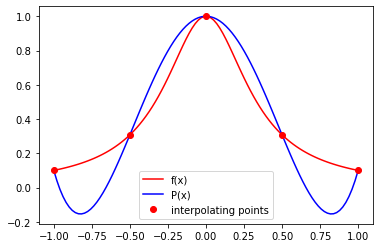

In [9]:
fig, ax = plt.subplots()
ax.plot(linx_for_plot,liny_fx,'r',linx_for_plot,liny_px,'b')
ax.plot(linx,liny,'ro')
ax.legend(['f(x)','P(x)','interpolating points'])
